In [ ]:
from PyQt5.QtGui import QPainter, QFont, QColor, QFontDatabase, QImage, QFontMetrics
from PyQt5.QtCore import QRect
from PyQt5.QtSvg import QSvgGenerator
from PyQt5.QtWidgets import QApplication
import pandas as pd

app = QApplication([]) # 1 l udaa unshuulahgui bol kernel deer error uguud bsn. ugvul restart hiine

fonts = [
        "CMDASHITSEDEN5.91.ttf",
        "MONGOLIANSCRIPT5.91.ttf",
        "MONGOLIANSYSTEM0.97.ttf",
        "NotoSansMongolian-Regular.ttf"
]






In [4]:
my_fonts = [
    '../../mongolian-nlp/image2bichig/fonts/Bichimel.ttf',
    '../../mongolian-nlp/image2bichig/fonts/Chagan.ttf',
    '../../mongolian-nlp/image2bichig/fonts/Garchag.ttf',
    '../../mongolian-nlp/image2bichig/fonts/mnglartotf.ttf',
    '../../mongolian-nlp/image2bichig/fonts/mngltitleotf.ttf',
    '../../mongolian-nlp/image2bichig/fonts/mnglwhiteotf.ttf',
    '../../mongolian-nlp/image2bichig/fonts/mnglwritingotf.ttf',
    '../../mongolian-nlp/image2bichig/fonts/NotoSansMongolian-Regular.ttf',
    '../../mongolian-nlp/image2bichig/fonts/Syurga.ttf',
    '../../mongolian-nlp/image2bichig/fonts/Urga.ttf',
    "../fonts/CMDASHITSEDEN5.91.ttf",
    "../fonts/MONGOLIANSCRIPT5.91.ttf",
    "../fonts/MONGOLIANSYSTEM0.97.ttf",
    "../fonts/NotoSansMongolian-Regular.ttf"
]


In [6]:
def generate_image(path, text, font="../fonts/CMDASHITSEDEN5.91.ttf", font_size = 40):
    # font_path = f"../fonts/{font}"  # Path to the font file
    font_path = font  # Path to the font file
    font_id = QFontDatabase.addApplicationFont(font_path)
    font_family = QFontDatabase.applicationFontFamilies(font_id)[0]

    # Create a QFont object with the loaded font family
    font_obj = QFont(font_family, font_size)

    # Measure the size of the text using QFontMetrics
    font_metrics = QFontMetrics(font_obj)
    text_width = font_metrics.horizontalAdvance(text)
    text_height = font_metrics.height()

    # Add some padding around the text
    padding = 20
    image_width = text_width + padding * 2
    image_height = text_height + padding * 2

    # Create the QImage object with the calculated dimensions
    image = QImage(image_width, image_height, QImage.Format_ARGB32)
    image.fill(QColor(255, 255, 255))  # Set background to white (or transparent)

    # Create a painter to draw the text on the image
    painter = QPainter(image)
    painter.setFont(font_obj)
    painter.setPen(QColor(0, 0, 0))  # Set the pen color (black)

    # Draw the text, centered in the image
    painter.drawText(padding, text_height-padding, text)  # Positioning based on padding
    painter.end()

    # Save the image as PNG
    image.save(path, "PNG")

In [32]:
path = "../../dataset/tmp1.png"
generate_image(path, "ᠮᠣᠨᠭᠭᠣᠯ ᠤᠯᠰ", my_fonts[13])

In [29]:
len(my_fonts)

14

In [19]:

def generate_comparison_image(path, text, fonts, font_size=40, padding=20):
    """
    Generate an image displaying the given text in multiple fonts for comparison.

    :param path: Path to save the generated image.
    :param text: Text to render.
    :param fonts: List of font file names.
    :param font_size: Font size.
    :param padding: Padding around each text row.
    """
    # Load fonts and measure text dimensions
    font_data = []
    max_width = 0
    row_height = 0

    for font in fonts:
        font_path = font
        print(font_path)
        font_id = QFontDatabase.addApplicationFont(font_path)
        font_family = QFontDatabase.applicationFontFamilies(font_id)[0]

        font_obj = QFont(font_family, font_size)
        font_metrics = QFontMetrics(font_obj)

        text_width = font_metrics.horizontalAdvance(text)
        text_height = font_metrics.height()

        max_width = max(max_width, text_width)
        row_height = max(row_height, text_height + padding * 2)  # Ensure consistent row height

        font_data.append((font_obj, font_family))

    # Calculate final image dimensions
    image_width = max_width + padding * 2
    image_height = row_height * len(fonts)  # Each font gets one row

    # Create the final image
    image = QImage(image_width, image_height, QImage.Format_ARGB32)
    image.fill(QColor(255, 255, 255))  # White background

    painter = QPainter(image)
    painter.setPen(QColor(0, 0, 0))  # Black text

    # Draw text in each font
    for i, (font_obj, font_family) in enumerate(font_data):
        y_position = i * row_height + (row_height // 2)  # Center text in row
        painter.setFont(font_obj)
        painter.drawText(padding, y_position, text)  # Left-aligned with padding

    painter.end()
    
    # Save the final image
    image.save(path, "PNG")

# Example usage
generate_comparison_image("output.png", "ᠤᠲᠠᠰᠤ ᠴᠢᠨᠢ ᠰᠦᠢᠷᠡᠴᠢᠬᠡᠪᠡ", my_fonts)


../../mongolian-nlp/image2bichig/fonts/Bichimel.ttf
../../mongolian-nlp/image2bichig/fonts/Chagan.ttf
../../mongolian-nlp/image2bichig/fonts/Garchag.ttf
../../mongolian-nlp/image2bichig/fonts/mnglartotf.ttf
../../mongolian-nlp/image2bichig/fonts/mngltitleotf.ttf
../../mongolian-nlp/image2bichig/fonts/mnglwhiteotf.ttf
../../mongolian-nlp/image2bichig/fonts/mnglwritingotf.ttf
../../mongolian-nlp/image2bichig/fonts/NotoSansMongolian-Regular.ttf
../../mongolian-nlp/image2bichig/fonts/Syurga.ttf
../../mongolian-nlp/image2bichig/fonts/Urga.ttf
../fonts/CMDASHITSEDEN5.91.ttf
../fonts/MONGOLIANSCRIPT5.91.ttf
../fonts/MONGOLIANSYSTEM0.97.ttf
../fonts/NotoSansMongolian-Regular.ttf


In [2]:
df = pd.read_csv("../../dataset/qa.csv")

In [12]:
df

,question,answer
0,ᠭᠠᠷ ᠤᠲᠠᠰᠤ ᠴᠢᠨᠢ ᠰᠦᠢᠷᠡᠴᠢᠬᠡᠪᠡ ᠦᠦ ︖,ᠡᠨᠡ ᠭᠠᠷ ᠤᠲᠠᠰᠤ ᠠᠮᠠᠷᠬᠠᠨ ᠰᠦᠢᠷᠡᠨ᠎ᠡ ᠃
1,ᠪᠢᠳᠡ ᠶᠠᠭᠤᠨ ᠤ ᠤᠴᠢᠷ ᠠᠴᠠ ᠠᠮᠢᠳᠤᠷᠠᠵᠤ ᠪᠠᠢᠬᠤ ᠪᠤᠶ ?,ᠠᠮᠢᠳᠤᠷᠠᠯ ᠪᠤᠯ ᠵᠢᠷᠠᠭᠠᠯ ᠃
2,ᠪᠦᠯᠦ ᠠᠬ᠎ᠠ ᠱᠧᠨᠶᠠᠩ ᠳᠤ ᠪᠠᠢ᠌ᠭᠰᠠᠭᠠᠷ ᠤᠤ?,ᠲᠡᠢᠮᠦ ᠡ᠂ᠦᠷᠬᠦᠯᠵᠢ ᠡᠨᠳᠡ ᠪᠠᠢᠳᠠᠭ᠃
3,ᠴᠢ ᠬᠠᠷᠢᠵᠤ ᠢᠷᠡᠬᠦ ᠭᠡᠵᠤ ᠪᠠᠢᠨ᠎ᠠ ᠦᠦ?,ᠲᠡᠶᠢᠮᠦ᠃ ᠬᠠᠷᠢᠵᠤ ᠢᠷᠡᠭᠡᠳ ᠬᠡᠳᠦᠨ ᠡᠳᠦᠷ ᠰᠠᠭᠤᠬᠤ ᠭᠡᠵᠦ ᠪ...
4,ᠲᠠᠨ ᠤ ᠳᠡᠯᠭᠡᠭᠦᠷ ᠲᠦ ᠲᠤᠰᠬᠠᠶᠢᠯᠠᠨ ᠥᠨᠳᠡᠭᠡ ᠲᠡᠶ ᠪᠣᠭᠣᠷᠰ...,ᠪᠢᠳᠡ ᠭᠠᠭᠴᠠ ᠥᠨᠳᠡᠭᠡᠨ ᠪᠣᠭᠣᠷᠰᠣᠭ ᠬᠤᠳᠠᠯᠳᠤᠳᠠᠭ ᠂ ᠠᠮᠲᠠᠯ...
...,...,...
49995,ᠴᠢ ᠵᠠᠯᠠᠭᠤᠴᠤᠳ ᠤᠨ ᠵᠣᠬᠢᠶᠠᠯ ᠢ ᠦᠵᠡᠵᠦ ᠥᠩᠭᠡᠷᠡᠪᠡ ᠦᠦ,ᠦᠭᠡᠢ ᠰᠢᠸ᠂ ᠴᠢ ᠦᠵᠡᠵᠦ ᠥᠩᠭᠡᠷᠡᠭᠰᠡᠨ ᠦᠦ
49996,ᠪᠢᠳᠡ ᠮᠠᠤ ᠲᠡᠷᠢᠭᠦᠯᠡᠭᠴᠢ ᠳᠦ ᠪᠠᠶᠠᠷ ᠬᠦᠷᠭᠡᠶ᠎ᠡ᠃,ᠬᠤᠪᠢᠰᠬᠠᠯ ᠤᠨ ᠪᠠᠭᠠᠲᠤᠷ ᠮᠥᠨ ᠰᠢᠸ ᠳ᠋ᠡ! ᠪᠢᠳᠡ ᠲᠡᠭᠦᠨ ᠡᠴ...
49997,ᠠᠮᠧᠷᠢᠺᠠ ᠶᠢᠨ ᠬᠥᠭᠵᠢᠮ ᠦᠨ ᠸᠠᠩ ᠳᠤ ᠳᠤᠷᠠᠲᠠᠢ,ᠲᠤᠩ ᠬᠥᠭᠡᠷᠦᠬᠦᠨ ᠬᠡᠦᠬᠡᠨ᠂ ᠲᠡᠭᠦᠨ ᠢ ᠲᠣᠭᠣᠭᠠᠳ ᠤᠳᠠᠪᠠ
49998,ᠴᠢ ᠭᠢᠰᠬᠢᠭᠦᠷ ᠲᠡᠷᠭᠡ ᠨᠠᠭᠠᠳᠬᠤ ᠳᠤᠷᠠᠲᠠᠢ ᠦᠦ,ᠵᠠ ᠂ ᠶᠡᠬᠡ ᠵᠦᠭᠡᠷ ᠰᠢᠸ ᠂ ᠪᠢ ᠳᠤᠷᠠᠲᠠᠶ


In [50]:
s=0
for index, row in df.iterrows():
    if(index%10==0):
        print(f"{index} out of 100")
    text = row['question']
    path = path = f"../dataset/mini_qa_images/question/{index}.png"
    generate_image(path, text, fonts[3])
    text = row['answer']
    path = path = f"../dataset/mini_qa_images/answer/{index}.png"
    generate_image(path, text, fonts[3])


0 out of 100
10 out of 100
20 out of 100
30 out of 100
40 out of 100
50 out of 100
60 out of 100
70 out of 100
80 out of 100
90 out of 100


In [43]:
# df.columns = ["question", "answer"]
mini = df.head(100)

In [44]:
mini.to_csv("../dataset/mini_qa.csv")

In [ ]:
ᠭᠠᠷ ᠤᠲᠠᠰᠤ ᠴᠢᠨᠢ ᠰᠦᠢᠷᠡᠴᠢᠬᠡᠪᠡ ᠦᠦ ︖
ᠪᠢᠳᠡ ᠶᠠᠭᠤᠨ ᠤ ᠤᠴᠢᠷ ᠠᠴᠠ ᠠᠮᠢᠳᠤᠷᠠᠵᠤ ᠪᠠᠢᠬᠤ ᠪᠤᠶ ?

In [3]:
import os
import json
import random
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import uuid

In [34]:
output_dir = "../../dataset/qa_words"
os.makedirs(output_dir, exist_ok=True)
data = []
df = pd.read_csv("../../dataset/qa.csv")
for idx, row in df.iterrows():
    if len(data)>10000:
        break
    for column in ["question", "answer"]:
        words = row[column].split()
        
        for word in words:
            if len(word) >= 5:
                # selected_fonts = random.sample(my_fonts, min(3, len(my_fonts)))
                selected_fonts=[my_fonts[13]]
                for font in selected_fonts:
                    image_name = f"{uuid.uuid4().hex}.png"
                    image_path = os.path.join(output_dir, image_name)
                    
                    generate_image(image_path, word, font, 40)
                    
                    data.append({
                        "image_path": image_path,
                        "label": word,
                        "font": font
                    })

json_path = os.path.join(output_dir, "data.json")
with open(json_path, "w", encoding="utf-8") as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

print(f"Saved metadata to {json_path}")


Saved metadata to ../../dataset/qa_words\data.json


In [10]:
random.sample(my_fonts, min(3, len(my_fonts)))

['../../mongolian-nlp/image2bichig/fonts/Bichimel.ttf',
 '../../mongolian-nlp/image2bichig/fonts/Syurga.ttf',
 '../../mongolian-nlp/image2bichig/fonts/mnglwritingotf.ttf']

In [4]:
def plot_character_distribution(json_path):
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    
    char_counts = Counter()
    for entry in data:
        char_counts.update(entry["label"])
    
    chars, counts = zip(*char_counts.items())
    
    plt.figure(figsize=(12, 6))
    plt.bar(chars, counts)
    plt.xlabel("Characters")
    plt.ylabel("Frequency")
    plt.title("Character Frequency in Labels")
    plt.xticks(rotation=90)
    plt.show()
    
    return char_counts

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\adiya\AppData\Local\Temp\ipykernel_2776\1213786293.py:1: SyntaxWarning: invalid escape sequence '\d'
  c = plot_character_distribution("../../dataset/qa_words\data.json")
c:\Users\adiya\miniconda3\envs\mn-ocr\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 6180 (\N{MONGOLIAN LETTER U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\adiya\miniconda3\envs\mn-ocr\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 6194 (\N{MONGOLIAN LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\adiya\miniconda3\envs\mn-ocr\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 6176 (\N{MONGOLIAN LETTER A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\adiya\miniconda3\envs\mn-ocr\Lib\site-packages\IPython\core\pylabtools.

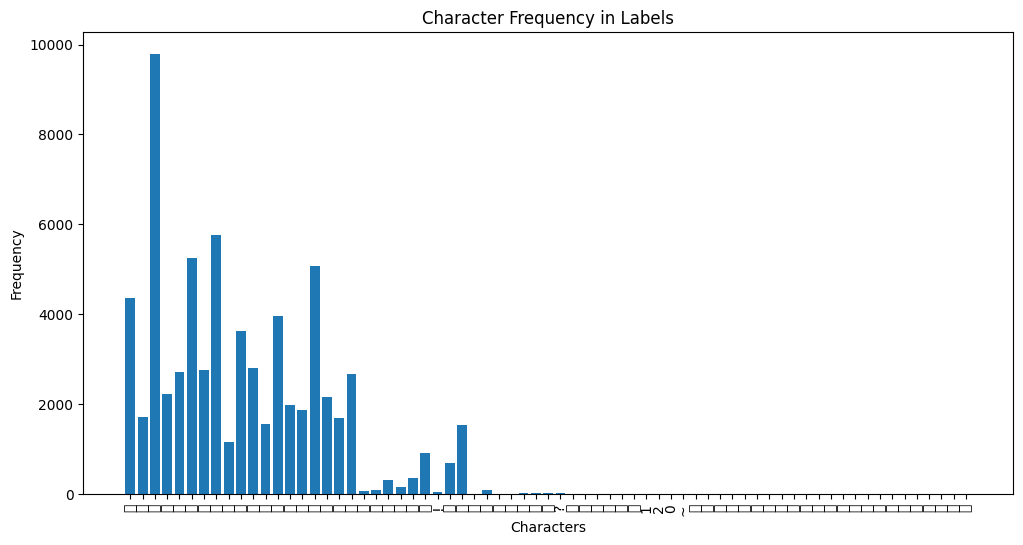

In [6]:
c = plot_character_distribution("../../dataset/qa_words\data.json")

In [7]:
chars, counts = zip(*c.items())

In [ ]:
s=0
mi=1000000
for i in range(len(counts)):
    mi = min(mi, counts[i])
    if counts[i]<10:
        s+=1
        print(chars[i])

︖
ᠹ






1
2
0
~





？




ᠼ














In [ ]:
mi


1